## 2.1. Installing Required Libraries

In [1]:
# pip install scikit-learn
# pip install numpy
# pip install pandas
# pip install matplotlib
# pip install seaborn
# pip install nltk
# pip install regex
# pip install wordcloud

## 2.2. Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline

## 2.3. Importing the Dataset

In [3]:
# https://www.kaggle.com/karthickveerakumar/spam-filter?select=emails.csv
data_path = "E:\Machine Learning and Data Science Projects with Python\Datasets\emails.csv"
message_dataset = pd.read_csv(data_path, engine='python')
message_dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
message_dataset.shape

(5728, 2)

## 2.4. Data Visualization

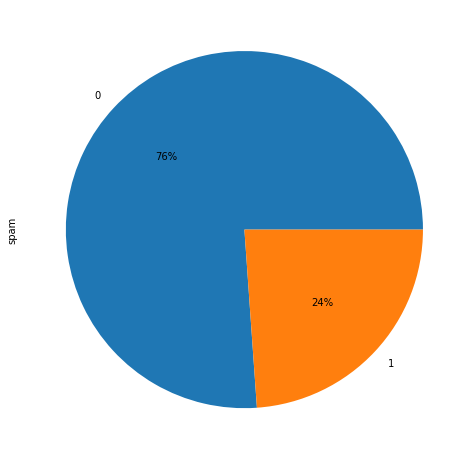

In [5]:
plt.rcParams["figure.figsize"] = [8,10] 
message_dataset.spam.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [27]:
from nltk.corpus import stopwords
stop = stopwords.words('english')


message_dataset['text_without_sw'] = message_dataset['text'] .apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

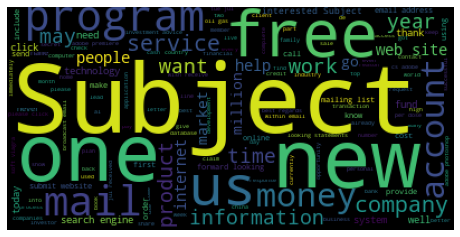

In [28]:
message_dataset_spam = message_dataset[message_dataset["spam"] == 1]

plt.rcParams["figure.figsize"] = [8,10] 
text = ' '.join(message_dataset_spam['text_without_sw'])
wordcloud2 = WordCloud().generate(text)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

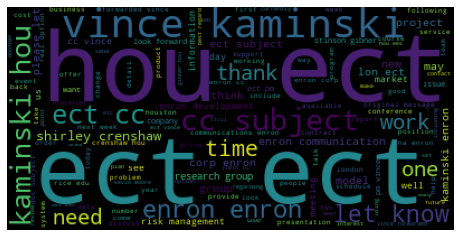

In [29]:
message_dataset_ham = message_dataset[message_dataset["spam"] == 0]

plt.rcParams["figure.figsize"] = [8,10] 
text = ' '.join(message_dataset_ham['text_without_sw'])
wordcloud2 = WordCloud().generate(text)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

## 2.5. Cleaning the Data

In [9]:
X = message_dataset["text"]

y = message_dataset["spam"]


In [10]:
def clean_text(doc):


    document = re.sub('[^a-zA-Z]', ' ', doc)

    document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)

    document = re.sub(r'\s+', ' ', document)

    return document


In [11]:
X_sentences = []
reviews = list(X)
for rev in reviews:
    X_sentences.append(clean_text(rev))

## 2.6. Converting Text to Numbers

In [12]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X= vectorizer.fit_transform(X_sentences).toarray()

## 2.7. Training the Model

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
spam_detector = MultinomialNB()
spam_detector.fit(X_train, y_train)

MultinomialNB()

## 2.8. Evaluating Model Performance

In [15]:
y_pred = spam_detector.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[849   7]
 [ 18 272]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       856
           1       0.97      0.94      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146

0.9781849912739965


## 2.9. Making Prediction on Single Instance

In [17]:
print(X_sentences[56])
print(y[56])

Subject localized software all languages available hello we would like to offer localized software versions german french spanish uk and many others aii iisted software is available for immediate downioad no need to wait week for cd deiivery just few exampies norton lnternet security pro windows xp professionai with sp fuil version corei draw graphics suite dreamweaver mx homesite inciudinq macromedia studio mx just browse our site and find any software you need in your native ianguaqe best reqards kayieen 
1


In [18]:
print(spam_detector.predict(vectorizer.transform([X_sentences[56]])))

[1]


## Exercise 2.1

**Question 1:**

Which attribute of the TfidfVectorizer vectorizer is used to define the minimum word count:

A. min_word

B. min_count

C. min_df

D. None of the Above

**Answer: C**
    

**Question 2:**

Which method of the MultinomialNB object is used to train the algorithm on the input data:

A. train()

B. fit()

C. predict()
 
D. train_data()

**Answer: B**
    
    
**Question 3:**

Spam email filtering with naive bayes algorithm is a type of _______ learning problem

A. Supervised 

B. Unsupervised

C. Reinforcement

D. Lazy
    
**Answer: A**